In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df=pd.read_csv('flights.csv',parse_dates=[['year','month']],index_col=['year_month'])

In [11]:
df.head()

,passengers
year_month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


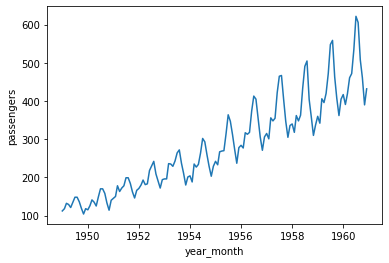

In [30]:
sns.lineplot(x=df.index,y='passengers',data=df)

In [48]:
test_ind=len(df)-15

In [49]:
train=df.iloc[:test_ind]

In [50]:
test=df.iloc[test_ind:]

In [51]:
train

,passengers
year_month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-05-01,420
1959-06-01,472
1959-07-01,548


In [52]:
test

,passengers
year_month,
1959-10-01,407
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535


In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler=MinMaxScaler()

In [55]:
scaled_train=scaler.fit_transform(train)

In [56]:
scaled_test=scaler.transform(test)

In [57]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [58]:
length=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [59]:
X,y=generator[0]

In [60]:
X

array([[[0.01758242],
        [0.03076923],
        [0.06153846],
        [0.05494505],
        [0.03736264],
        [0.06813187],
        [0.0967033 ],
        [0.0967033 ],
        [0.07032967],
        [0.03296703],
        [0.        ],
        [0.03076923]]])

In [61]:
y

array([[0.02417582]])

In [62]:
scaled_train

array([[0.01758242],
       [0.03076923],
       [0.06153846],
       [0.05494505],
       [0.03736264],
       [0.06813187],
       [0.0967033 ],
       [0.0967033 ],
       [0.07032967],
       [0.03296703],
       [0.        ],
       [0.03076923],
       [0.02417582],
       [0.04835165],
       [0.08131868],
       [0.06813187],
       [0.04615385],
       [0.0989011 ],
       [0.14505495],
       [0.14505495],
       [0.11868132],
       [0.06373626],
       [0.02197802],
       [0.07912088],
       [0.09010989],
       [0.1010989 ],
       [0.16263736],
       [0.12967033],
       [0.14945055],
       [0.16263736],
       [0.20879121],
       [0.20879121],
       [0.17582418],
       [0.12747253],
       [0.09230769],
       [0.13626374],
       [0.14725275],
       [0.16703297],
       [0.1956044 ],
       [0.16923077],
       [0.17362637],
       [0.25054945],
       [0.27692308],
       [0.3032967 ],
       [0.23076923],
       [0.19120879],
       [0.14945055],
       [0.197

In [63]:
val_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [137]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [379]:
n_features=1
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))

In [380]:
model.compile(optimizer='adam',loss='mse')

In [381]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_35 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 129       
Total params: 53,857
Trainable params: 53,857
Non-trainable params: 0
_________________________________________________________________


In [382]:
from keras.callbacks import EarlyStopping

In [383]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5)


In [384]:
model.fit_generator(generator,validation_data=val_generator,epochs=20,callbacks=[early_stopping])

Epoch 1/20
117/117 [==============================] - 1s 7ms/step - loss: 0.0276 - val_loss: 0.0116
Epoch 2/20
117/117 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.0102
Epoch 3/20
117/117 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.0240
Epoch 4/20
117/117 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.0479
Epoch 5/20
117/117 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.0547
Epoch 6/20
117/117 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0157
Epoch 7/20
117/117 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0085
Epoch 8/20
117/117 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 2.9025e-06
Epoch 9/20
117/117 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.0015
Epoch 10/20
117/117 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 2.

In [385]:
losses=pd.DataFrame(model.history.history)

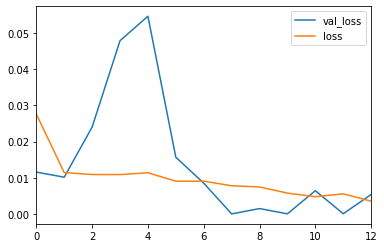

In [386]:
losses.plot()

In [387]:
import numpy as np

In [388]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [389]:
test_predictions

[array([0.64839536], dtype=float32),
 array([0.57081336], dtype=float32),
 array([0.5459564], dtype=float32),
 array([0.53581625], dtype=float32),
 array([0.5534988], dtype=float32),
 array([0.5890985], dtype=float32),
 array([0.6375212], dtype=float32),
 array([0.7393356], dtype=float32),
 array([0.8816451], dtype=float32),
 array([0.9993462], dtype=float32),
 array([0.9561945], dtype=float32),
 array([0.8240737], dtype=float32),
 array([0.7034704], dtype=float32),
 array([0.61950326], dtype=float32),
 array([0.5701581], dtype=float32)]

In [390]:
true_predictions=scaler.inverse_transform(test_predictions)

In [391]:
test['Predictions']=np.round(true_predictions)

C:\Users\yousuf\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [392]:
test

,passengers,Predictions
year_month,,
1959-10-01,407,399.0
1959-11-01,362,364.0
1959-12-01,405,352.0
1960-01-01,417,348.0
1960-02-01,391,356.0
1960-03-01,419,372.0
1960-04-01,461,394.0
1960-05-01,472,440.0
1960-06-01,535,505.0


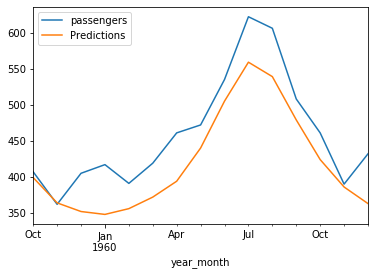

In [393]:
test.plot()

In [394]:
from sklearn.metrics import mean_squared_error,explained_variance_score

In [395]:
np.sqrt(mean_squared_error(test['passengers'],test['Predictions']))

46.85438435550438

In [396]:
explained_variance_score(test['passengers'],test['Predictions'])

0.9025648020972487

In [399]:
from sklearn.preprocessing import MinMaxScaler

In [400]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(d)

In [401]:
scaled_full=scaler.fit_transform(df)

In [404]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [405]:
generator=TimeseriesGenerator(scaled_full,scaled_full,length=length,batch_size=1)

In [406]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [407]:
n_features=1
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))

In [408]:
model.compile(optimizer='adam',loss='mse')

In [409]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 129       
Total params: 53,857
Trainable params: 53,857
Non-trainable params: 0
_________________________________________________________________


In [410]:
model.fit_generator(generator,epochs=13)

Epoch 1/13
132/132 [==============================] - 1s 6ms/step - loss: 0.0250
Epoch 2/13
132/132 [==============================] - 1s 4ms/step - loss: 0.0120
Epoch 3/13
132/132 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 4/13
132/132 [==============================] - 1s 4ms/step - loss: 0.0096
Epoch 5/13
132/132 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 6/13
132/132 [==============================] - 1s 4ms/step - loss: 0.0064
Epoch 7/13
132/132 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 8/13
132/132 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 9/13
132/132 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 10/13
132/132 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 11/13
132/132 [==============================] - 1s 4ms/step - loss: 0.0030
Epoch 12/13
132/132 [==============================] - 1s 4ms/step - loss: 0.0041
Epoch 13/13
132/132 [====

In [411]:
losses=pd.DataFrame(model.history.history)

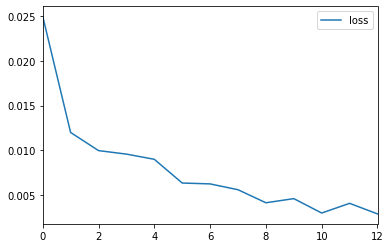

In [412]:
losses.plot()

In [427]:
forecast=[]
periods=12
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [428]:
forecast=scaler.inverse_transform(forecast)

In [429]:
df

,passengers
year_month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [430]:
forecast

array([[487.94578362],
       [459.0119797 ],
       [460.21018469],
       [472.66456354],
       [499.32138276],
       [544.98253965],
       [602.25857854],
       [707.36685705],
       [840.07713747],
       [969.49544168],
       [941.63878107],
       [807.17305994]])

In [431]:
forecast_index=pd.date_range(start='1961-1-01',periods=periods,freq="MS")

In [432]:
forecast_index

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [433]:
forecast_df=pd.DataFrame(forecast,index=forecast_index,columns=["Forecast"])

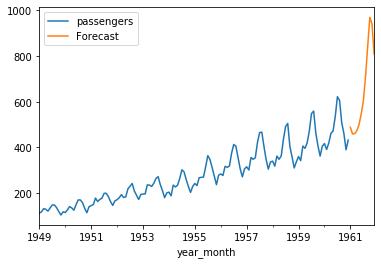

In [441]:
ax=df.plot()
forecast_df.plot(ax=ax)
# plt.xlim("1959-01-01","1961-12-01")

In [481]:
df.tail()

,passengers
year_month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [450]:
import joblib
model.save('passenger.h5')
joblib.dump(scaler,'passenger_scaler.pkl')

['passenger_scaler.pkl']

In [475]:
sample_json={"Forecast":[118,132,129,121,135,148,148,136,119,104,118,115]}

In [500]:
import numpy as np
def return_predictions(model,scaler,sample_json):
    sales=sample_json['Forecast']
    reshaped_sales=np.array(sales).reshape(12,1)
    scaled_sales=scaler.transform(reshaped_sales)
    forecast=[]
    periods=int(input('Enter no of month to predict'))
    first_eval_batch=scaled_sales[-12:]
    current_batch=first_eval_batch.reshape((1,12,1))

    for i in range(periods):
        current_pred=model.predict(current_batch)[0]

        forecast.append(current_pred)
        current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
        date=pd.date_range(start='2020-11-01',periods=periods,freq="MS").tolist()
    return scaler.inverse_transform(current_batch.tolist()[0][-periods:]).tolist()

In [501]:
from keras.models import load_model
scaler_model=joblib.load('passenger_scaler.pkl')
model=load_model('passenger.h5')

In [502]:
return_predictions(model,scaler_model,sample_json)

Enter no of month to predict2


[[147.82514733076098], [160.38675576448443]]